## 4 nodes

In [1]:
%run ../imports.py

In [2]:
G = nx.DiGraph()

In [3]:
G.add_nodes_from([0,1,2,3])
G.add_edges_from([
    (0,1),
    (1,2),
    (1,3)
])

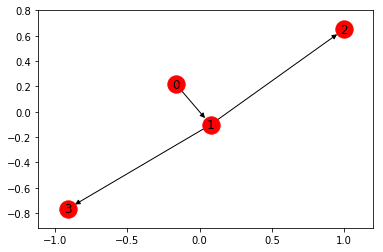

In [4]:
nx.draw_networkx(G)

In [5]:
L = out_degree_laplacian(G)
np.linalg.matrix_rank(L)

2

In [6]:
Q = orth_matrix(L).T
rL = np.matmul(Q, np.matmul(L, np.transpose(Q)))
sigma = solve_lyapunov(rL, np.identity(np.linalg.matrix_rank(L)))
x = 2*np.matmul(np.transpose(Q), np.matmul(sigma, Q))
eqL = np.linalg.pinv(x)

In [7]:
Q

matrix([[ 0.14644661, -0.85355339,  0.35355339,  0.35355339],
        [ 0.85355339, -0.14644661, -0.35355339, -0.35355339]])

In [8]:
sigma

array([[ 0.22263107, -0.04166667],
       [-0.04166667,  0.69403559]])

In [10]:
posG, negG = separate_graphs(eqL)

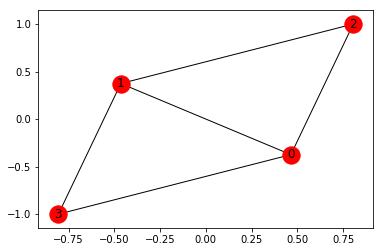

In [12]:
nx.draw_networkx(posG)

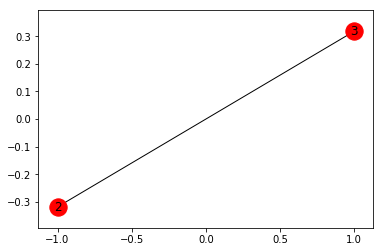

In [14]:
nx.draw_networkx(negG)